In [14]:
##check the working directory
import os
import pandas as pd
import numpy as np
import string
#allow plotting
%matplotlib inline
%qtconsole --colors=linux --ConsoleWidget.font_size=12 --ConsoleWidget.font_family='Consolas'


os.getcwd()

'C:\\Users\\Aron'

#Spotify/Tidal Vs iTunes/7Digital/MP3

Import dummy data set and carry out some analysis to prove or disprove hypothesis

##Step 1 Import Data

In [15]:
df = pd.read_csv("play.csv")
df.rename(columns=lambda x: '{}'.format('_'.join([y.strip(string.punctuation) for y in x.lower().split()])), inplace=True)
df.head()

,play_id,time,action_type,lon,lat,title,artist,user_id,platform,source_name,device,ip_address
0,3000001,2013-12-07T07:51:22Z,PLAY,108.06960,-7.31370,Mrs,Oasis,1111,Ios,Spotify,Apple,102.112.248.110
1,3000002,2015-04-14T01:53:11Z,PLAY,108.45020,-7.15970,Mr,Oasis,1112,Ios,iTunes,Apple,42.9.124.102
2,3000003,2013-11-15T05:27:12Z,PLAY,16.46738,50.08601,Rev,Oasis,1113,Ios,Android,Apple,50.237.56.25
3,3000004,2013-11-21T15:30:21Z,PLAY,16.46738,50.08601,Mrs,Oasis,1114,Ios,Spotify,Apple,67.254.185.93
4,3000005,2015-04-29T12:52:34Z,PLAY,42.70355,37.14805,Rev,Oasis,1115,Ios,iTunes,Apple,128.125.128.244


##Step 2 Add A Year Column

In [16]:
df['time'] = df['time'].astype('datetime64[ns]')
df['year'] = df['time'].apply(
            lambda x: x.year)

##Step 3 Eliminate iOS data(rows)

In [17]:
df = df.drop(df[df.platform == 'Ios'].index)


##Step 4 Evaluate Tidal/Spot Vs iTunes..

In [18]:
from collections import Counter
myDict=Counter(df.source_name)
myDict

Counter({'iTunes': 112, 'Tidal': 108, 'Spotify': 106, 'Android': 101, '7Digital': 93})

Tidal + Spotify = 214

Other = 306

Tidal/Spotify type offerings have 41% Market Share

In [19]:
df['Tidal'] = df.apply(lambda x: 1 if x['source_name'] == 'Tidal' else 0,  axis=1)
df['iTunes'] = df.apply(lambda x: 1 if x['source_name'] == 'iTunes' else 0,  axis=1)
df['Spotify'] = df.apply(lambda x: 1 if x['source_name'] == 'Spotify' else 0,  axis=1)
df['7Digital'] = df.apply(lambda x: 1 if x['source_name'] == '7Digital' else 0,  axis=1)
df['Android'] = df.apply(lambda x: 1 if x['source_name'] == 'Android' else 0,  axis=1)


# Step 5
#Might be interesting to segment by year to see if the market share is trending upwards

In [20]:
pivot_year = df.pivot_table('action_type',rows='year',cols='source_name', aggfunc=len,fill_value=0)
pivot_year

source_name,7Digital,Android,Spotify,Tidal,iTunes
year,,,,,
2013,29,39,38,35,36
2014,41,41,46,53,59
2015,23,21,22,20,17


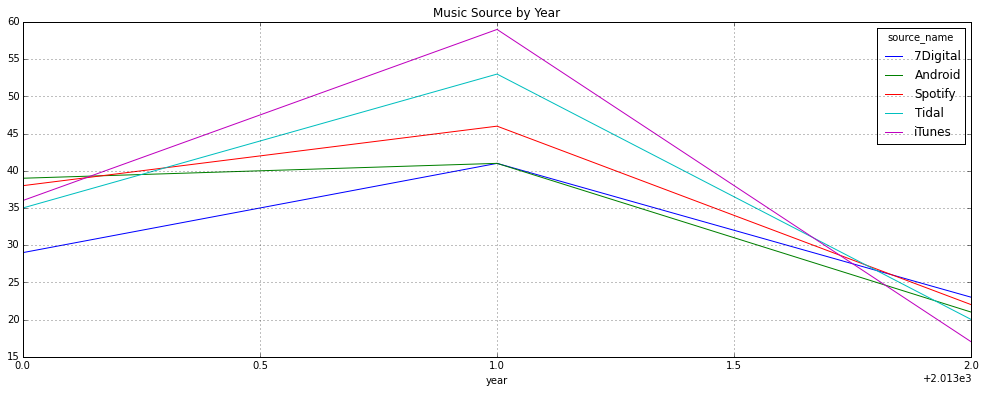

In [21]:

pivot_year.plot(title='Music Source by Year',figsize=(17, 6))

#Step 6
#Lets Also Visualise Spotify/Tidal Vs Others

Must create a new column called source_group

Spotify and Tidal = NextGen

iTunes etc.       = OldGen

Write a short loop to code NextGen or OldGen based of source name column

In [22]:
def classify(row):
    if row['source_name']=='iTunes':
        return "OldGen"
    if row['source_name']=='7Digital':
        return "OldGen"
    if row['source_name']=='Android':
        return "OldGen"
    else: 
        return "NextGen"

In [23]:
df["source_group"] = df.apply(classify,axis=1)




In [24]:
pivot_yearG = df.pivot_table('action_type',rows='year',cols='source_group', aggfunc=len,fill_value=0)
pivot_yearG

source_group,NextGen,OldGen
year,,
2013,73,104
2014,99,141
2015,42,61


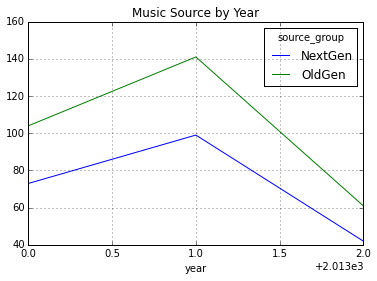

In [25]:

pivot_yearG.plot(title='Music Source by Year')

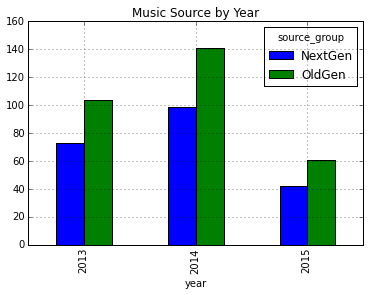

In [26]:
pivot_yearG.plot(kind='bar',title='Music Source by Year')

#Step 7
#Lets Bring in User data and analyse Music Source V Listener DOB

In [27]:
user = pd.read_excel('User.xlsx')
user.rename(columns=lambda x: 'U{}'.format('_'.join([y.strip(string.punctuation) for y in x.lower().split()])), inplace=True)
user.head()

,Uuser_id,Udateofbirth
0,1111,1973-01-01
1,1112,1992-01-01
2,1113,NaT
3,1114,1993-01-01
4,1115,2007-01-01


In [28]:
user['dobyear'] = user['Udateofbirth'].apply(
            lambda x: x.year)
user.head()

,Uuser_id,Udateofbirth,dobyear
0,1111,1973-01-01,1973
1,1112,1992-01-01,1992
2,1113,NaT,NaN
3,1114,1993-01-01,1993
4,1115,2007-01-01,2007


Remove blanks

In [16]:
user1 = user.dropna()
user1.head()

,Uuser_id,Udateofbirth,dobyear
0,1111,1973-01-01,1973
1,1112,1992-01-01,1992
3,1114,1993-01-01,1993
4,1115,2007-01-01,2007
5,1116,1992-01-01,1992


Merge The Play data set with the User data set based on user id

In [17]:
#merge data sets based on user_id
df2 = pd.merge(df,user1,how='left', left_on='user_id', right_on='Uuser_id')

For the purpose of this analysis we will only analyse Users who have their DOB registered

In [19]:
df3 = df2.dropna()
df3.head()

,play_id,time,action_type,lon,lat,title,artist,user_id,platform,source_name,...,year,Tidal,iTunes,Spotify,7Digital,Android,source_group,Uuser_id,Udateofbirth,dobyear
1,3000482,2014-08-26 04:57:46,PLAY,114.48982,22.54077,Rev,Oasis,1592,Android,Android,...,2014,0,0,0,0,1,OldGen,1592,1996-01-01,1996
2,3000483,2014-04-26 04:44:33,PLAY,109.24833,-7.50389,Rev,Oasis,1593,Android,iTunes,...,2014,0,1,0,0,0,OldGen,1593,1986-01-01,1986
6,3000487,2013-09-17 05:34:56,PLAY,14.77262,53.96849,Mr,Oasis,1597,Android,Tidal,...,2013,1,0,0,0,0,NextGen,1597,1991-01-01,1991
8,3000489,2014-05-30 14:00:32,PLAY,29.99200,-3.92790,Honorable,Oasis,1599,Android,Tidal,...,2014,1,0,0,0,0,NextGen,1599,1982-01-01,1982
9,3000490,2014-09-14 15:38:37,PLAY,113.30108,30.37747,Mrs,Oasis,1600,Android,iTunes,...,2014,0,1,0,0,0,OldGen,1600,1986-01-01,1986


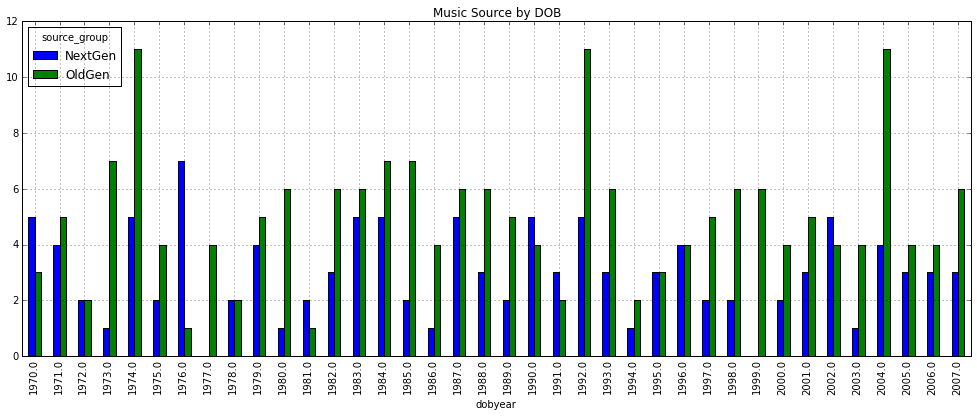

In [20]:
df3_pivot = df3.pivot_table('user_id', rows='dobyear', cols='source_group', aggfunc=len, fill_value=0)
df3_pivot.plot(kind='bar',title='Music Source by DOB',figsize=(17, 6))



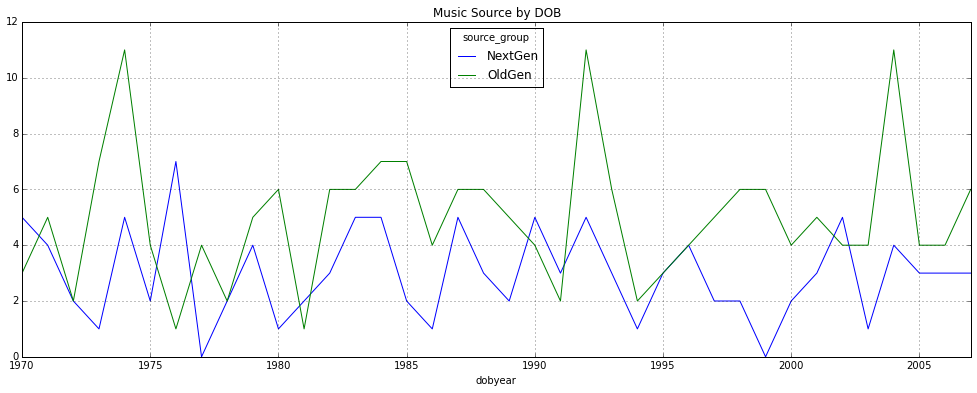

In [21]:
df3_pivot.plot(title='Music Source by DOB',figsize=(17, 6))